# Late Fusion
## Modality 4: Biometrics

## Setup

In [1]:
import os
from glob import glob
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import pickle
import copy

### Paths

In [2]:
input_path = '../../../2_data_preprocessing/output/'

output_path = '../output/'

# Global configuration path
glob_conf_path = '../../../config/'

### Load global variables

In [3]:
exec(open(os.path.join(glob_conf_path, 'global_config_paper.py')).read())
exec(open(os.path.join(glob_conf_path, 'config_feature_contributions.py')).read())

## Model interpretation

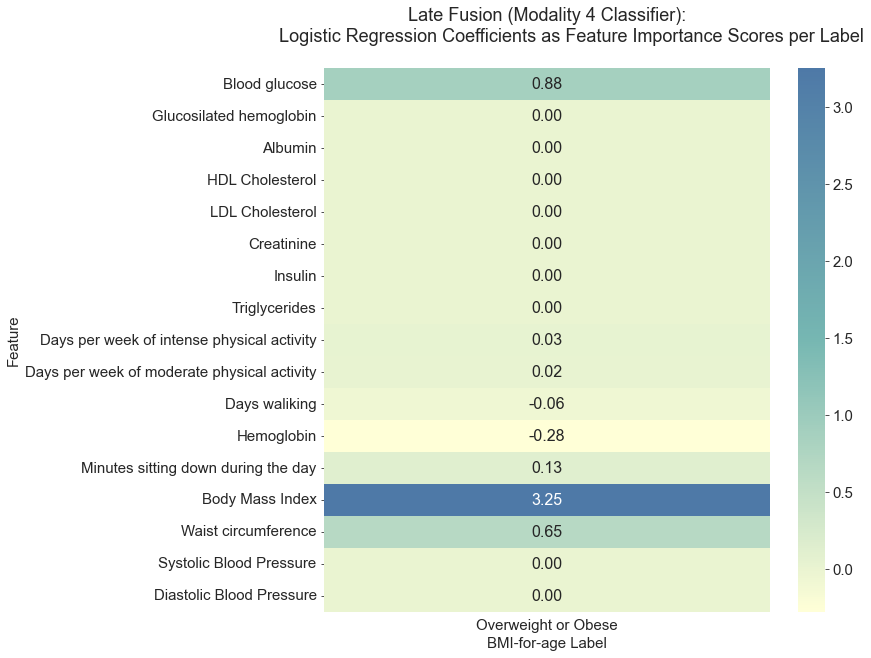

In [4]:
# Load data
train_m4_df = pd.read_csv(os.path.join(input_path, 'train_m4_norm_df.csv'))
feat = list(train_m4_df.drop(columns=['label','group']).columns)


# Load the model from disk
file_path = os.path.join(output_path,'models','mod_elastic_net_m4.sav')
clf = pickle.load(open(file_path, 'rb'))
coef_df = pd.DataFrame(clf.coef_, index=list(label_id_to_label_num_coef_int.keys()), columns=feat).T
#coef_df = coef_df.reindex(sorted(coef_df.columns), axis=1)
coef_df = coef_df.rename(var_name_to_feat_m4, axis=0)
#coef_df = coef_df.reindex(list(var_name_to_feat_m4.values())).dropna()
coef_df.to_csv(os.path.join(output_path,'others','tmp','m4_classifier_feature_contributions.csv'), index=True, header=True)


# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(10,10))
sns.heatmap(coef_df, annot=True, annot_kws={"size": 16}, fmt='.2f', cmap=conf_cmap)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Feature')
plt.savefig(os.path.join(output_path,'others','report_m4_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 4 Classifier):
          Logistic Regression Coefficients as Feature Importance Scores per Label
          """)
plt.savefig(os.path.join(output_path,'others','m4_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})

In [8]:
coef_df_ordered = coef_df.sort_values(by="Overweight or Obese", axis=0, ascending=False)
coef_df_ordered

,Overweight or Obese
Body Mass Index,3.249705
Blood glucose,0.882673
Waist circumference,0.654638
Minutes sitting down during the day,0.131218
Days per week of intense physical activity,0.029114
Days per week of moderate physical activity,0.015265
Creatinine,0.000000
Insulin,0.000000
Triglycerides,0.000000
Glucosilated hemoglobin,0.000000


In [6]:
clf.coef_

array([[ 0.8826735 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.02911378,  0.01526504,
        -0.06463526, -0.27824316,  0.13121792,  3.24970529,  0.65463836,
         0.        ,  0.        ]])

c:\Users\rosar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\rosar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


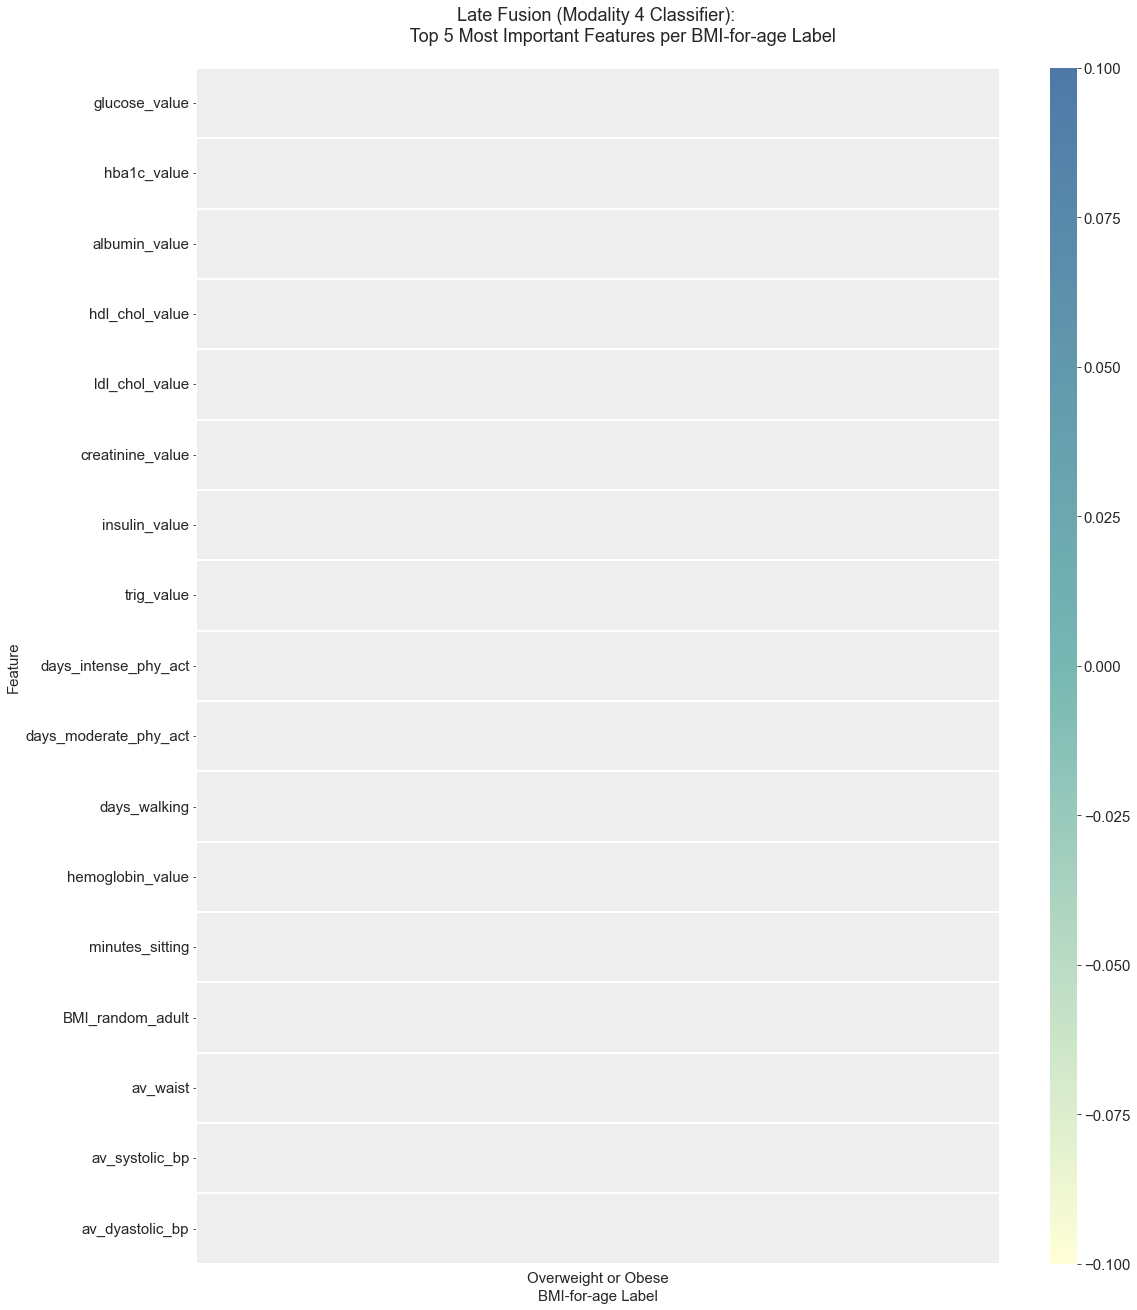

In [7]:
data = coef_df.copy()
data_abs = data.abs()
top_features_per_BMI_for_age_label = {}
n = 5
for c in data.columns:
    top_features_per_BMI_for_age_label[c] = data_abs.nlargest(n, columns=c).index.tolist()

#all_features = set(data.index.tolist())
features_to_keep = set([item for sublist in top_features_per_BMI_for_age_label.values() for item in sublist])
#features_to_drop = all_features - features_to_keep

data_reduced = data.loc[features_to_keep].reindex(data.index).dropna()
data_reduced = data_reduced.reindex(feat_order_summary_m4)
mask = np.array([[feat not in top_features_per_BMI_for_age_label[c] for feat in data_reduced.index] for c in data_reduced.columns]).T
data_reduced.mask(mask).to_csv(os.path.join(output_path,'others','tmp','m4_classifier_feature_contributions_top_'+str(n)+'.csv'), index=True, header=True)

# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(18,22))
hm = sns.heatmap(data_reduced, annot=True, annot_kws={"size": 13}, fmt='.2f', cmap=conf_cmap, cbar_kws={"aspect": 45}, linewidth=0.25, mask=mask)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Feature')
ax = hm.axes
ax.set_facecolor((238/255, 238/255, 238/255))
plt.savefig(os.path.join(output_path,'others','report_m4_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 4 Classifier): 
          Top """ + str(n) + """ Most Important Features per BMI-for-age Label
          """)
plt.savefig(os.path.join(output_path,'others','m4_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})